# 

In [58]:
# First load some libraries, including History Matching
%load_ext autoreload
%autoreload 2

import os, glob, re, sys, json
import re
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import pickle
from IPython.display import display
import seaborn as sns
sys.path.append(os.path.dirname(os.getcwd()))
from PythonHelperFunctions.utils import load_output_path
sns.set(font_scale=2)
sns.set_style("white")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
def fix_glob(pth):
    return re.sub('([\[\]])','[\\1]', pth)

### Just get the outputs and look at doubling time and total incidence

In [110]:
def process_output_file(outpath=None):
    with open(os.path.join(outpath, 'results.pkl'), 'rb') as file:
        raw = pickle.load(file)
    processed = pd.DataFrame(columns=['SimID', 'Sample', 'Base_Infectivity', 'New Infections', 'Infected'])
    i = 0
    for x, y in raw.items():
        i = i+1
        processed = processed.append(pd.Series({'SimID': y['sim_id'], 
                    'Sample': y['tags']['__sample_index__'],
                    'Base_Infectivity': y['tags']['Base_Infectivity_Constant'], 
                    'New Infections': y['insetChart']['Channels']['New Infections']['Data'],
                    'Infected': [sum(i) for i in zip(y['insetChart']['Channels']['Infectious Population']['Data'],
                                 y['insetChart']['Channels']['Exposed Population']['Data'])]}, 
                    name=y['tags']['__sample_index__']))
        if i%25 == 0:
            print('On sim '+str(i)+' of '+str(len(raw.keys())))
    with open(os.path.join(outpath, 'processed.pkl'), 'wb') as pklfile:
        pickle.dump(processed, pklfile)


In [111]:
folderNames= os.listdir (load_output_path()) # get all files' and folders' names in the current directory
reprocess = True
processed = {}
for folderName in folderNames: # loop through all the files and folders
    if os.path.isdir(os.path.join(load_output_path(), folderName)):
        outpath = os.path.join(load_output_path(), folderName, 'simOutputs')
        if not os.path.exists(os.path.join(outpath, 'processed.pkl')) or reprocess:
            process_output_file(outpath)
        with open(os.path.join(outpath, 'processed.pkl'), 'rb') as pklfile:
            processed[folderName] = pickle.load(pklfile)


On sim 25 of 500
On sim 50 of 500
On sim 75 of 500
On sim 100 of 500
On sim 125 of 500
On sim 150 of 500
On sim 175 of 500
On sim 200 of 500
On sim 225 of 500
On sim 250 of 500
On sim 275 of 500
On sim 300 of 500
On sim 325 of 500
On sim 350 of 500
On sim 375 of 500
On sim 400 of 500
On sim 425 of 500
On sim 450 of 500
On sim 475 of 500
On sim 500 of 500
On sim 25 of 500
On sim 50 of 500
On sim 75 of 500
On sim 100 of 500
On sim 125 of 500
On sim 150 of 500
On sim 175 of 500
On sim 200 of 500
On sim 225 of 500
On sim 250 of 500
On sim 275 of 500
On sim 300 of 500
On sim 325 of 500
On sim 350 of 500
On sim 375 of 500
On sim 400 of 500
On sim 425 of 500
On sim 450 of 500
On sim 475 of 500
On sim 500 of 500
On sim 25 of 1000
On sim 50 of 1000
On sim 75 of 1000
On sim 100 of 1000
On sim 125 of 1000
On sim 150 of 1000
On sim 175 of 1000
On sim 200 of 1000
On sim 225 of 1000
On sim 250 of 1000
On sim 275 of 1000
On sim 300 of 1000
On sim 325 of 1000
On sim 350 of 1000
On sim 375 of 1000
On s

In [112]:
figdir = 'InterventionAnalysisFigures'
if not os.path.exists(figdir):
    os.mkdir(figdir)

In [113]:
mean_results = {}
p95 = {}
p05 = {}
mean_prev = {}
p95_prev = {}
p05_prev = {}
for key, value in processed.items():
    tmp = np.stack(value['New Infections'].to_numpy())
    tmp=tmp[tmp[:,30]!=0,:]  #Remove simulations where infection doesn't take off.
    mean_results[key] = tmp.mean(axis=0)
    p95[key] = np.quantile(tmp,.95, axis=0)
    p05[key] = np.quantile(tmp,.05, axis=0)
    tmp = np.stack(value['Infected'].to_numpy())
    tmp=tmp[tmp[:,30]!=0,:]  #Remove simulations where infection doesn't take off.
    mean_prev[key] = tmp.mean(axis=0)
    p95_prev[key] = np.quantile(tmp,.95, axis=0)
    p05_prev[key] = np.quantile(tmp,.05, axis=0)
    #Now smooth some things out to make the plots prettier.  On the days the intervention is applied, people are switching from 
    #"pre-intervention" to "post-intervention" transmission matrices, and nobody gets infected on those days.  
    #Just average the points around them to remove this artifact from the plots
#    if any([i in key for i in ['Base', 'Cal']]):
#        continue
    #More clever ways exist to do this but this is quicker to do one time
#    else:
#        mean_results[key][72] = mean_results[key][71]/2+mean_results[key][73]/2
#        p95[key][72] = p95[key][71]/2+p95[key][73]/2
#        p05[key][72] = p05[key][71]/2+p05[key][73]/2
#    if '4Weeks' in key:
#        mean_results[key][100] = mean_results[key][99]/2+mean_results[key][101]/2
#        p95[key][100] = p95[key][99]/2+p95[key][101]/2
#        p05[key][100] = p05[key][99]/2+p05[key][101]/2  
#    if '8Weeks' in key:
#        mean_results[key][128] = mean_results[key][127]/2+mean_results[key][129]/2
#        p95[key][128] = p95[key][127]/2+p95[key][129]/2
#        p05[key][128] = p05[key][127]/2+p05[key][129]/2  
#    if '12Weeks' in key:
#        mean_results[key][156] = mean_results[key][155]/2+mean_results[key][157]/2
#        p95[key][156] = p95[key][155]/2+p95[key][157]/2
#        p05[key][156] = p05[key][155]/2+p05[key][157]/2  

In [114]:
colors = [[77, 161, 126], [213, 116, 62], [113, 109, 174], [224, 55, 148], [191, 213 , 232]]
for i in range(len(colors)):
    colors[i] = [j/256 for j in colors[i]]

In [115]:
def camel_case_split(identifier):
    matches = re.finditer('.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)', identifier)
    return [m.group(0) for m in matches]

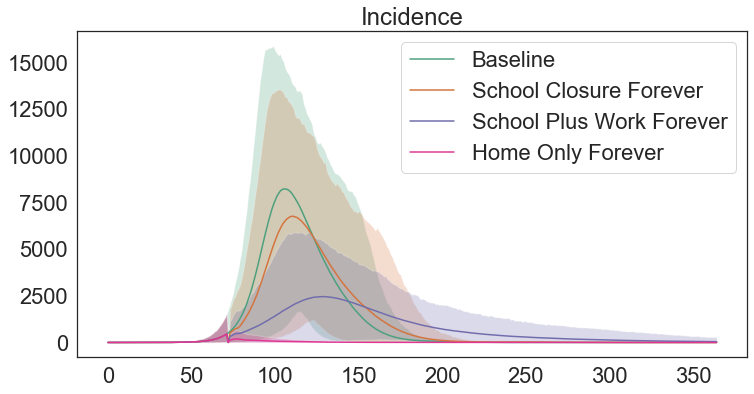

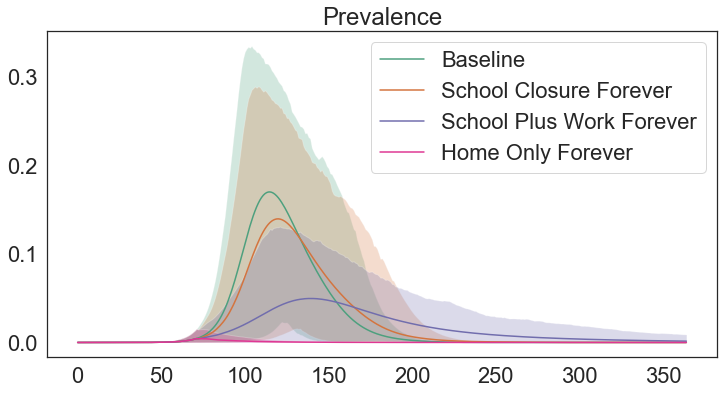

In [120]:
exp_names = ['Baseline', 'SchoolClosureForever','SchoolPlusWorkForever', 'HomeOnlyForever']
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
i=0
t = [i for i in range(365)]
for key in exp_names:
    plt.plot(mean_results[key], color=colors[i])
    plt.fill_between(t, p05[key], p95[key], facecolor=colors[i], alpha=0.25)
    i=i+1
plt.legend([' '.join(camel_case_split(x)) for x in exp_names])
plt.title('Incidence')
plt.savefig(os.path.join(figdir, 'scenarios_inc.svg'), dpi=600, bbox_inches='tight')

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
i=0
t = [i for i in range(365)]
for key in exp_names:
    plt.plot(mean_prev[key], color=colors[i])
    plt.fill_between(t, p05_prev[key], p95_prev[key], facecolor=colors[i], alpha=0.25)
    i=i+1
plt.title('Prevalence')
plt.legend([' '.join(camel_case_split(x)) for x in exp_names])
plt.savefig(os.path.join(figdir, 'scenarios_prev.svg'), dpi=600, bbox_inches='tight')
    

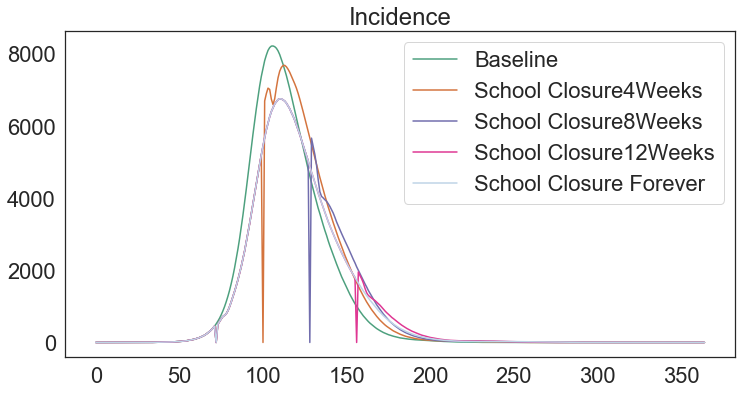

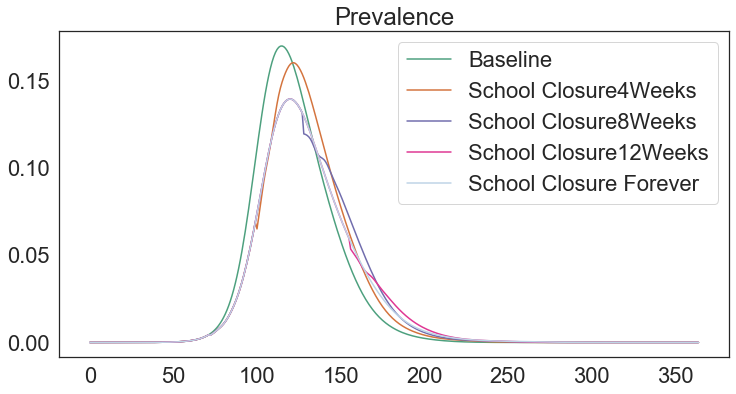

In [121]:
exp_names = ['Baseline', 'SchoolClosure4Weeks', 'SchoolClosure8Weeks','SchoolClosure12Weeks','SchoolClosureForever']
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
i=0
t = [i for i in range(365)]
for key in exp_names:
    
    plt.plot(mean_results[key], color=colors[i])
    #plt.fill_between(t, p05[key], p95[key], facecolor=colors[i], alpha=0.25)
    i=i+1
plt.legend([' '.join(camel_case_split(x)) for x in exp_names])
plt.title('Incidence')
plt.savefig(os.path.join(figdir, 'school_closure.svg'), dpi=600, bbox_inches='tight')

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
i=0
t = [i for i in range(365)]
for key in exp_names:
    
    plt.plot(mean_prev[key], color=colors[i])
    #plt.fill_between(t, p05[key], p95[key], facecolor=colors[i], alpha=0.25)
    i=i+1
plt.title('Prevalence')
plt.legend([' '.join(camel_case_split(x)) for x in exp_names])
plt.savefig(os.path.join(figdir, 'school_closure_prev.svg'), dpi=600, bbox_inches='tight')

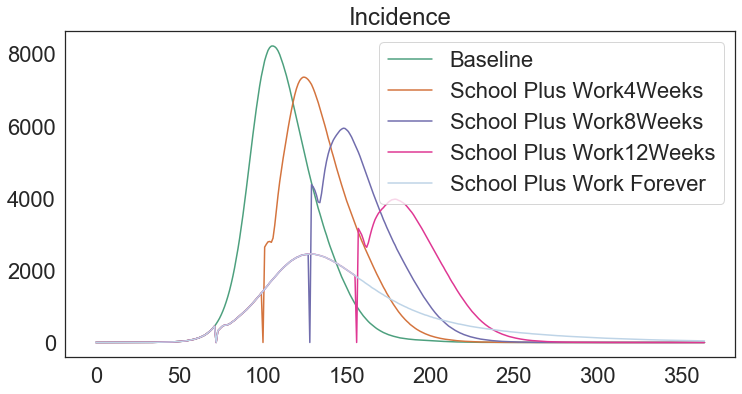

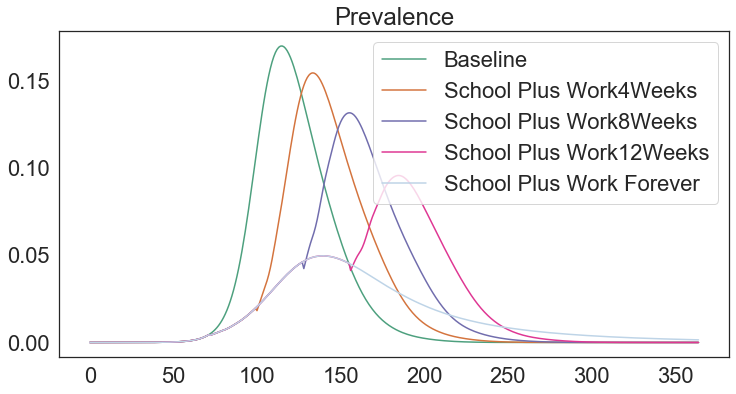

In [122]:
exp_names = ['Baseline', 'SchoolPlusWork4Weeks', 'SchoolPlusWork8Weeks','SchoolPlusWork12Weeks','SchoolPlusWorkForever']
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
i=0
t = [i for i in range(365)]
for key in exp_names:
    
    plt.plot(mean_results[key], color=colors[i])
    #plt.fill_between(t, p05[key], p95[key], facecolor=colors[i], alpha=0.25)
    i=i+1
plt.legend([' '.join(camel_case_split(x)) for x in exp_names])
plt.title('Incidence')
plt.savefig(os.path.join(figdir, 'school_plus_work.svg'), dpi=600, bbox_inches='tight')

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
i=0
t = [i for i in range(365)]
for key in exp_names:
    
    plt.plot(mean_prev[key], color=colors[i])
    #plt.fill_between(t, p05[key], p95[key], facecolor=colors[i], alpha=0.25)
    i=i+1
plt.title('Prevalence')
plt.legend([' '.join(camel_case_split(x)) for x in exp_names])
plt.savefig(os.path.join(figdir, 'school_plus_work_prev.svg'), dpi=600, bbox_inches='tight')

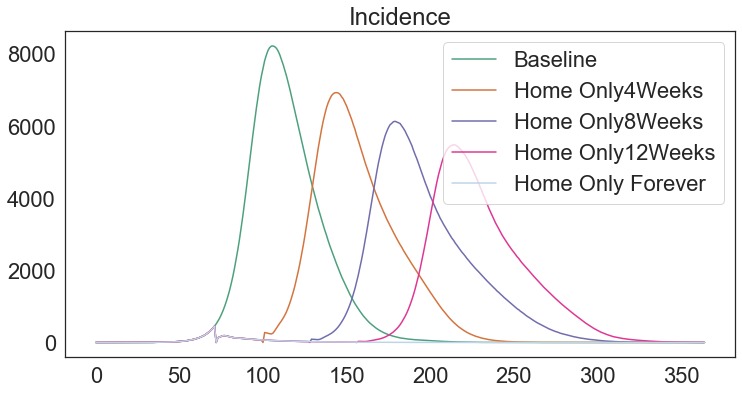

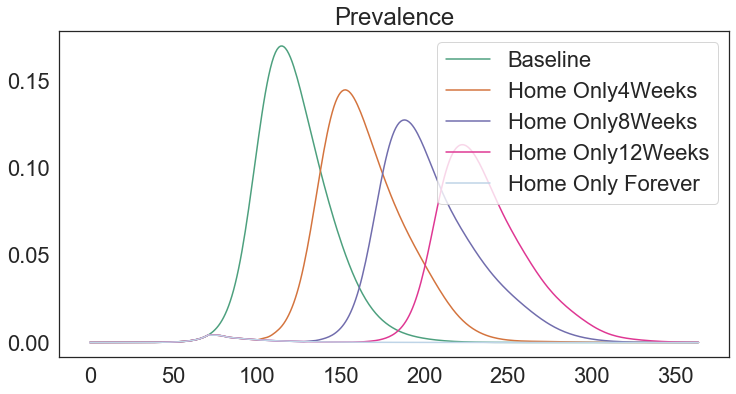

In [125]:
exp_names = ['Baseline', 'HomeOnly4Weeks', 'HomeOnly8Weeks','HomeOnly12Weeks','HomeOnlyForever']
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
i=0
t = [i for i in range(365)]
for key in exp_names:
    
    plt.plot(mean_results[key], color=colors[i])
    #plt.fill_between(t, p05[key], p95[key], facecolor=colors[i], alpha=0.25)
    i=i+1
plt.legend([' '.join(camel_case_split(x)) for x in exp_names])
plt.title('Incidence')
plt.savefig(os.path.join(figdir, 'homeonly.svg'), dpi=600, bbox_inches='tight')

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
i=0
t = [i for i in range(365)]
for key in exp_names:
    
    plt.plot(mean_prev[key], color=colors[i])
    #plt.fill_between(t, p05[key], p95[key], facecolor=colors[i], alpha=0.25)
    i=i+1
plt.title('Prevalence')
plt.legend([' '.join(camel_case_split(x)) for x in exp_names])
plt.savefig(os.path.join(figdir, 'homeonly_prev.svg'), dpi=600, bbox_inches='tight')